# Recognizing Persian Digits

## Introduction to problem
Given images of Persian Digits with their labels, predict what is the digit inside each image:
<img src="figs/persian_digits.PNG" width="400px" height="500px">

![digit_image](figs/8-Digit-Recognition.png)

## Contents
* Libraries & Constants
* Machine Learning Categories
* Algorithm Selection
* Loading and Preprocessing 
* Model Impelemtation
* Training
* Model Evaluation
* Prediction

## Libraries & Constants

In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
import random
import utils
from PIL import Image
import tensorflow as tf
from IPython.display import display
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
%matplotlib inline

In [2]:
root = './data/Digits/isolated digits/'
prediction_root = './data/Digits/segmented digits/'
binary_save_path = './binary_data/isolated digits/'
model_save_path = './models/'
num_labels= 10
image_size = 28
batch_size = 64
epochs = 40
hidden_layer_neurons = 15

## Machine Learning Categories
* Supervised Learning
* Unsupervised Learning
* Semi-supervised Learning
* Reinforcement Learning

## Algorithm Selection
<ol>
    <li>Linear Regression</li>
    <li>Logistic Regression</li>
    <li>Decision Tree</li>
    <li>Neural Networks</li>
    <li>Naive Bayes</li>
    <li>SVM</li>
    <li>kNN</li>
    <li>Etc...</li>
</ol>

We choose neural networks because of:
* Number of features: 28*28=784
* Experiments showed that Neural Networks are good at classifying images
![neural_network](figs/Neural-network-with-hidden-layer-for-MNIST-data.png)

## Loading and Preprocessing Data
First we will load and normalize data, then we resize all of the images in (28,28) size and save it to binary .npy file:
<img src="figs/normalize.gif" width="200px" height="300px" style="display: block;margin-left: auto;margin-right: auto;">
<img src="figs/prepro1.jpeg" style="display: block;margin-left: auto;margin-right: auto;">

In [3]:
data_paths = utils.maybe_save(root,binary_save_path,image_size)

./binary_data/isolated digits/0.npy already present - Loading Data.
./binary_data/isolated digits/1.npy already present - Loading Data.
./binary_data/isolated digits/2.npy already present - Loading Data.
./binary_data/isolated digits/3.npy already present - Loading Data.
./binary_data/isolated digits/4.npy already present - Loading Data.
./binary_data/isolated digits/5.npy already present - Loading Data.
./binary_data/isolated digits/6.npy already present - Loading Data.
./binary_data/isolated digits/7.npy already present - Loading Data.
./binary_data/isolated digits/8.npy already present - Loading Data.
./binary_data/isolated digits/9.npy already present - Loading Data.


Checking if data is Balanced across diffrent classes : 

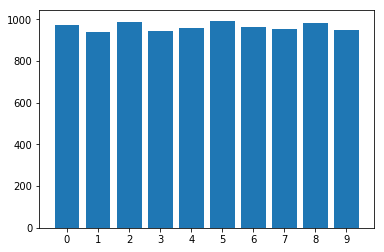

In [4]:
def balancingCheck(data_folder) :
    dictionary = {}
    tmpList = None
    for i,ds in enumerate(data_folder) :
        dataset = np.load(ds)
        dictionary[i] = len(dataset)
    plt.bar(range(len(dictionary)), list(dictionary.values()), align='center')
    plt.xticks(range(len(dictionary)), list(dictionary.keys()))
    plt.show()
balancingCheck(data_paths)

As you see data is almost balanced over diffrent classes.

Merging and Creating Label for datasets :

In [5]:
def merge_datasets(data_paths) :    
    data = np.concatenate([np.load(path) for path in data_paths],axis=0)
    label = np.concatenate([[path[-5]]*len(np.load(path)) for i,path in enumerate(data_paths)])
    return data,label
data,labels = merge_datasets(data_paths)

We should shuffle data:

In [6]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels
data,labels = randomize(data,labels)

We want to make sure that data still looks good:

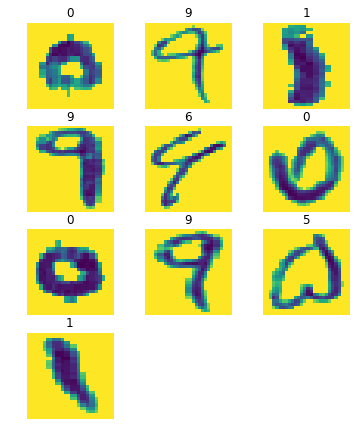

In [7]:
def visualize(dataset,labels,size = 10) :
    samples = np.random.randint(len(dataset),size=size)
    for i,sample in enumerate(samples) :
        plt.subplots_adjust(top=1.5)
        plt.subplot(np.ceil(np.sqrt(size)),np.floor(np.sqrt(size)),1+i)
        plt.axis('off')
        plt.title(labels[sample])
        plt.imshow(dataset[sample])
visualize(data,labels,10)

In [8]:
def reformat(data,labels) :
    data = np.array(data).reshape((-1,image_size*image_size)).astype(np.float32)
    labels = (np.arange(num_labels) == labels[:,None].astype(np.float32))
    return data,labels
data,labels = reformat(data,labels)
print('shape of data : {}'.format(data.shape))
print('shape of labels : {}'.format(labels.shape))

shape of data : (9653, 784)
shape of labels : (9653, 10)


![train_validate_test](figs/train-validate-test.png)

In [9]:
def train_valid_test_spliter(data,labels) :
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    return X_train,y_train,X_val,y_val,X_test,y_test
X_train,y_train,X_val,y_val,X_test,y_test = train_valid_test_spliter(data,labels)
print('train data shape: {}'.format(X_train.shape))
print('train labels shape: {}'.format(X_train.shape))
print('valid data shape : {}'.format(X_val.shape))
print('valid labels shape: {}'.format(y_val.shape))
print('test data shape : {}'.format(X_test.shape))
print('test labels shape: {}'.format(y_test.shape))

train data shape: (6177, 784)
train labels shape: (6177, 784)
valid data shape : (1545, 784)
valid labels shape: (1545, 10)
test data shape : (1931, 784)
test labels shape: (1931, 10)


## Model Implementation

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(hidden_layer_neurons, activation='relu', input_shape=(image_size*image_size,)))
model.add(tf.keras.layers.Dense(num_labels, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

## Training

In [19]:
history = model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_val,y_val),callbacks=callbacks)

Train on 6177 samples, validate on 1545 samples
Epoch 1/40
5120/6177 [=======================>......] - ETA: 0s - loss: 0.3377 - acc: 0.9109{'val_loss': 0.3498847692819089, 'val_acc': 0.9087378640776699, 'loss': 0.33815116498855124, 'acc': 0.9114456855886014}
0
6177/6177 [==============================] - 0s 56us/step - loss: 0.3382 - acc: 0.9114 - val_loss: 0.3499 - val_acc: 0.9087
Epoch 2/40
5568/6177 [==========================>...] - ETA: 0s - loss: 0.3333 - acc: 0.9106{'val_loss': 0.348442464526803, 'val_acc': 0.9061488673139159, 'loss': 0.3346867349293696, 'acc': 0.9106362311705352}
1
6177/6177 [==============================] - 0s 62us/step - loss: 0.3347 - acc: 0.9106 - val_loss: 0.3484 - val_acc: 0.9061
Epoch 3/40
5696/6177 [==========================>...] - ETA: 0s - loss: 0.3325 - acc: 0.9124{'val_loss': 0.34502619982344435, 'val_acc': 0.9093851132686084, 'loss': 0.3313438591928916, 'acc': 0.9125789219321451}
2
6177/6177 [==============================] - 0s 54us/step - loss

Epoch 37/40
5504/6177 [=========================>....] - ETA: 0s - loss: 0.2528 - acc: 0.9326{'val_loss': 0.27695815292184023, 'val_acc': 0.9223300970873787, 'loss': 0.25360576054106954, 'acc': 0.9315201555503424}
36
logs: {'val_loss': 0.27695815292184023, 'val_acc': 0.9223300970873787, 'loss': 0.25360576054106954, 'acc': 0.9315201555503424}
better acc on batch 36: 0.9251779935275082
6177/6177 [==============================] - 1s 126us/step - loss: 0.2536 - acc: 0.9315 - val_loss: 0.2770 - val_acc: 0.9223
Epoch 38/40
5888/6177 [===========================>..] - ETA: 0s - loss: 0.2541 - acc: 0.9324{'val_loss': 0.27453057362809535, 'val_acc': 0.9242718446601942, 'loss': 0.2531515199263466, 'acc': 0.9324915008829001}
37
logs: {'val_loss': 0.27453057362809535, 'val_acc': 0.9242718446601942, 'loss': 0.2531515199263466, 'acc': 0.9324915008829001}
better acc on batch 37: 0.9255663430420711
6177/6177 [==============================] - 1s 118us/step - loss: 0.2532 - acc: 0.9325 - val_loss: 0.2

Visualizing the training and validation accuracy:

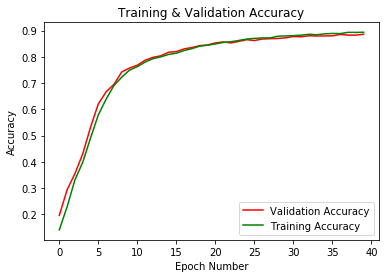

In [17]:
plt.plot(history.epoch, history.history['val_acc'], c='r')
plt.plot(history.epoch, history.history['acc'], c='g')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend(('Validation Accuracy', 'Training Accuracy'),
           loc='lower right')

## Model Evaluation

In [21]:
scores = model.evaluate(X_test,y_test)
print('Test Accuracy: %{}'.format(scores[1]*100))
print("Test Error: %{}".format(100 - scores[1]*100))


1931/1931 [==============================] - ETA:  - 1s 276us/step
Test Accuracy: %88.60693940345887
Test Error: %11.393060596541133


## Prediction

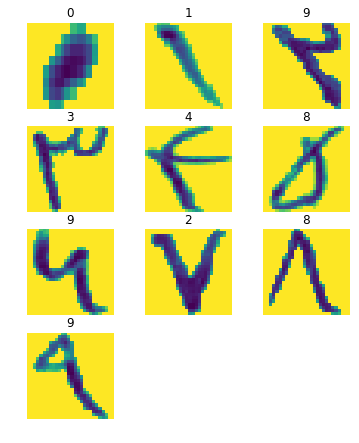

In [31]:
def predict_image(prediction_root,image_size,model) :
    for i,path in enumerate(os.listdir(prediction_root)):
        plt.subplots_adjust(top=1.5)
        photoes_path = os.path.join(prediction_root,path)
        photoes = os.listdir(photoes_path)
        photo_path = np.random.choice(photoes)
        processed_image = (np.array(Image.open(os.path.join(photoes_path, photo_path)).resize((image_size,image_size))).astype(float) - 
                            255.0 / 2) / 255.0
        photo = np.array(Image.open(os.path.join(photoes_path,photo_path)).resize((image_size,image_size))).astype(np.float)
        plt.subplot(np.ceil(np.sqrt(10)),np.floor(np.sqrt(10)),1+i)
        plt.axis('off')
        plt.title(np.argmax(model.predict(processed_image.reshape(1,image_size*image_size))))
        plt.imshow(photo)
predict_image(prediction_root,image_size,model)